In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

d:\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


### *A) Importar Dados de Chuvas, Pressao, Precipitação e Temperatura*

In [2]:
source_file =  '../../../../PrevisaoVento/Data/process/cenario1/dados_cenario1.csv'
df_wind = pd.read_csv(source_file, delimiter=';', index_col=0, parse_dates=['Data'])
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Longitude      8760 non-null   float64       
 1   Latitude       8760 non-null   float64       
 2   VentoPrevisto  8760 non-null   float64       
 3   Direcao        8760 non-null   float64       
 4   Data           8760 non-null   datetime64[ns]
 5   Pressao        8760 non-null   float64       
 6   Temperatura    8760 non-null   float64       
 7   Chuva          8760 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 615.9 KB


In [3]:
df_wind.isnull().sum() # registros nulos

Longitude        0
Latitude         0
VentoPrevisto    0
Direcao          0
Data             0
Pressao          0
Temperatura      0
Chuva            0
dtype: int64

### <span style="color:Blue"> ***D) Regressão Linear*** 

### <span style="color:#4169E1">**D1. Cálculos**

- slope = Inclinação da linha de regressão.<br>
- intercept= Interceptação da linha de regressão.<br>
- rvalue = Coeficiente de correlação.<br>
- pvalue= Valor p bilateral para um teste de hipótese cuja hipótese nula é que a inclinação é zero, usando o Teste de Wald com distribuição t da estatística de teste<br>
- stderr = (Desvio)Erro padrão da inclinação estimada (gradiente), considerando a normalidade residual.<br>


In [4]:
x = df_wind['Temperatura'] 
y = df_wind['VentoPrevisto']
a, b, r, p, std_err = stats.linregress(x,y)

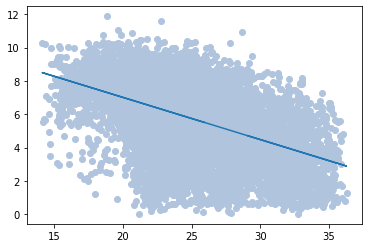

In [5]:
def estimate_y(x):
    return a * x + b

df_wind['y_Vento'] = df_wind['Temperatura'].apply(estimate_y)  
# A partir da coluna Vento observado, será criado uma nova coluna chamada y_estimado

plt.figure()
plt.plot(df_wind['Temperatura'], df_wind['y_Vento'])
plt.scatter(df_wind['Temperatura'], df_wind['VentoPrevisto'], color='#B0C4DE')
plt.show()

<span style="color:#4169E1">**D2. Coeficiente de Determinação**

In [6]:
coef_determinacao = r**2

print("A correlação é de: " + str(coef_determinacao) + " %") # Proximo de 1 é uma boa estimativa

A correlação é de: 0.26828085349080355 %


### <span style="color:#8B008B"> ***E) Regressão Linear Multipla*** 

<b>Formula:</b><br>
<i>
VentoVerificado = b0 + (b1 x VentoObservado) + (b2 x PressaoAtmosferica) + (b3 x Temperatura) + (b4 x Chuva) + (b5 x DirecaoGraus)
</i>
<p>
<b>Avaliação do P-valor:</b>
<br>p-valor = Probabilidade dos valores se referirem à hipotese nula
<br>p-valor baixo -> Melhor associação entre o preditor e o valor

<p><b>Tabela:</b>
<br>p-valor < 0.001 -> Alto nivel de certeza
<br>p-valor < 0.05  -> Nível de certeza moderado
<br>p-valor < 0.01  -> Nível de certeza fraco
<br>p-valor > 0.1  -> Não há nivel de certezaaceitávelno resultado

<i>Ou seja,</i> Coluna P>|t|. Quanto mais próximo o valor for de zero(0), mais correlacionado a variavel é.
<p>
<b>Como Avaliar o Summary:</b><br>
    1. <b><i>Teste F de Significancia  Global</b></i> (O modelo é útil para prever ?)<br>
Resposta: Verifique se o valor da coluna 'Prob(F-statistic) = valor p do teste F' é < 0,05. 
<br>Se houver, significa pelo menos 1 variavel no modelo está correlacionada a variavel dependente
<p>
    2. <b><i>Teste de significancia individua</b></i><br>
Resposta: Na tabela, verifique o valor P>|y| das variaveis independente são menores que 0.05.
<br>Se houver, há evidencias estatisticas de relação.
<p>
    3.<b><i> R2 e R2-Ajustado.</b></i><br>
Resposta: As variaveis independente explicam qual % de variabilidade da variavel dependente.<br>
    Verifique o valor da variavel "R-squared" para responder. Já o R2-Ajustado,que é sempre um pouco menor que o R2
    deve ser usado quando queremos comparar modelos com diferentes quantidades de variaveis.
<p>
<b><i>Quais são os coeficientes da equação</b></i><br>
Resposta: y = coef.intercept + coef.direcao x {valorDirecao} + coef.Magnitude_Observada x {Magnitude_Observada} + ...

#### <span style="color:#8B008B"> **R2 = 0.062 ~ Usando (  Direção )**

In [7]:
# Método: Ordinary Least Square
# Estimador escolhido: R2
#
model = ols('VentoPrevisto ~  Direcao' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VentoPrevisto   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     582.8
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          1.05e-124
Time:                        11:00:57   Log-Likelihood:                -18971.
No. Observations:                8760   AIC:                         3.795e+04
Df Residuals:                    8758   BIC:                         3.796e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0395      0.057    123.049      0.000       6.927       7.152
Direcao       -0.0119      0.000    -24.140      0.000      -0.013      -0.011
==============================================================================
Omnibus:                      339.102   Durbin-Watson:                   0.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.049
Skew:                          -0.453   Prob(JB):                     1.95e-75
Kurtosis:                       2.651   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color:#8B008B"> **R2 = 0.309 ~  Usando ( Direção + Temperatura )**

In [8]:
model = ols('VentoPrevisto ~ Temperatura + Direcao ' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VentoPrevisto   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1955.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:01:00   Log-Likelihood:                -17636.
No. Observations:                8760   AIC:                         3.528e+04
Df Residuals:                    8757   BIC:                         3.530e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.8703      0.115    111.552      0.000      12.644      13.096
Temperatura    -0.2439      0.004    -55.854      0.000      -0.252      -0.235
Direcao        -0.0096      0.000    -22.620      0.000      -0.010      -0.009
==============================================================================
Omnibus:                      466.759   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.908
Skew:                          -0.582   Prob(JB):                    1.74e-119
Kurtosis:                       3.380   Cond. No.                         704.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color:#8B008B"> **R2 = 0.353 ~  Usando (Direção + Pressão )**

In [9]:
model = ols('VentoPrevisto ~  Direcao + Pressao ' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VentoPrevisto   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     2394.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:01:03   Log-Likelihood:                -17343.
No. Observations:                8760   AIC:                         3.469e+04
Df Residuals:                    8757   BIC:                         3.471e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -315.7816      5.141    -61.418      0.000    -325.860    -305.703
Direcao       -0.0078      0.000    -18.767      0.000      -0.009      -0.007
Pressao        0.3176      0.005     62.790      0.000       0.308       0.328
==============================================================================
Omnibus:                       54.607   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.470
Skew:                          -0.193   Prob(JB):                     9.01e-13
Kurtosis:                       3.047   Cond. No.                     2.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color:#8B008B"> **R2 = 0.076 ~  Usando (Direção + Chuva )**

In [10]:
model = ols('VentoPrevisto ~ Chuva + Direcao ' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VentoPrevisto   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          8.48e-152
Time:                        11:01:06   Log-Likelihood:                -18905.
No. Observations:                8760   AIC:                         3.782e+04
Df Residuals:                    8757   BIC:                         3.784e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0006      0.057    123.064      0.000       6.889       7.112
Chuva         -0.9513      0.083    -11.514      0.000      -1.113      -0.789
Direcao       -0.0112      0.000    -22.601      0.000      -0.012      -0.010
==============================================================================
Omnibus:                      288.541   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.293
Skew:                          -0.407   Prob(JB):                     1.12e-62
Kurtosis:                       2.654   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color:#8B008B"> **R2 = 0.407 ~  Usando (Direção + Temperatura + Pressão )**

In [11]:
model = ols('VentoPrevisto ~ Temperatura + Direcao + Pressao ' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VentoPrevisto   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2007.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:01:09   Log-Likelihood:                -16961.
No. Observations:                8760   AIC:                         3.393e+04
Df Residuals:                    8756   BIC:                         3.396e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -217.4477      6.029    -36.066      0.000    -229.266    -205.629
Temperatura    -0.1383      0.005    -28.245      0.000      -0.148      -0.129
Direcao        -0.0077      0.000    -19.399      0.000      -0.009      -0.007
Pressao         0.2241      0.006     38.207      0.000       0.213       0.236
==============================================================================
Omnibus:                      168.592   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.981
Skew:                          -0.336   Prob(JB):                     1.36e-39
Kurtosis:                       3.199   Cond. No.                     3.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color:#8B008B"> **R2 = 0.415 ~  Usando (Direção + Temperatura + Pressão + Chuva )**

In [12]:
model = ols('VentoPrevisto ~ Temperatura + Direcao + Pressao + Chuva' , data = df_wind) 
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VentoPrevisto   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     1553.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:01:12   Log-Likelihood:                -16905.
No. Observations:                8760   AIC:                         3.382e+04
Df Residuals:                    8755   BIC:                         3.385e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -206.4049      6.080    -33.948      0.000    -218.323    -194.486
Temperatura    -0.1452      0.005    -29.580      0.000      -0.155      -0.136
Direcao        -0.0072      0.000    -18.181      0.000      -0.008      -0.006
Pressao         0.2134      0.006     36.074      0.000       0.202       0.225
Chuva          -0.7107      0.067    -10.640      0.000      -0.842      -0.580
==============================================================================
Omnibus:                      130.556   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.757
Skew:                          -0.288   Prob(JB):                     1.22e-30
Kurtosis:                       3.214   Cond. No.                     3.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""